In [37]:
import numpy as np
import pandas as pd

In [38]:
from sklearn.datasets import load_iris
iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [39]:
x = iris.data
y = iris.target

In [40]:
data = pd.DataFrame(x, columns=iris.feature_names)
data['target'] = pd.DataFrame(y.reshape(-1,1), columns=["target"])
data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [41]:
data['target'] = data['target'].astype("category")

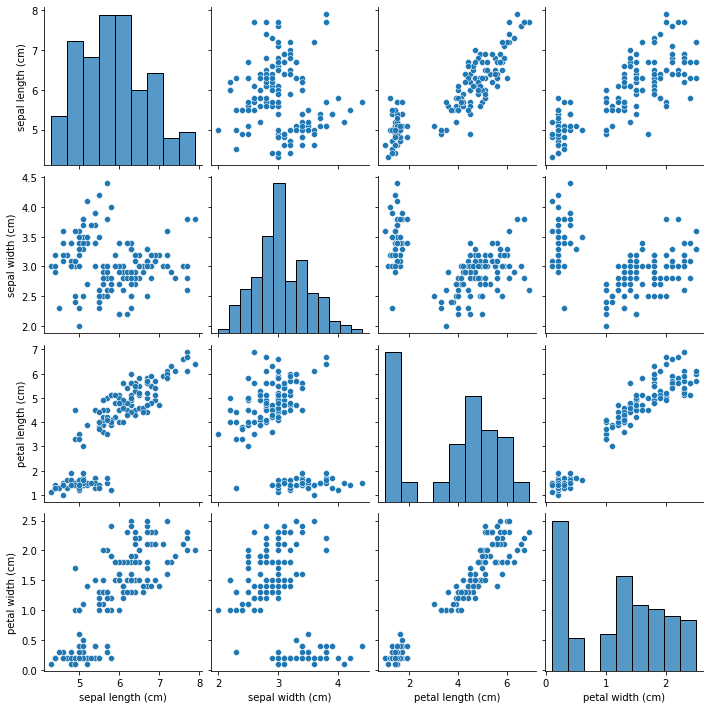

In [42]:
import seaborn as sb
sb.pairplot(data)

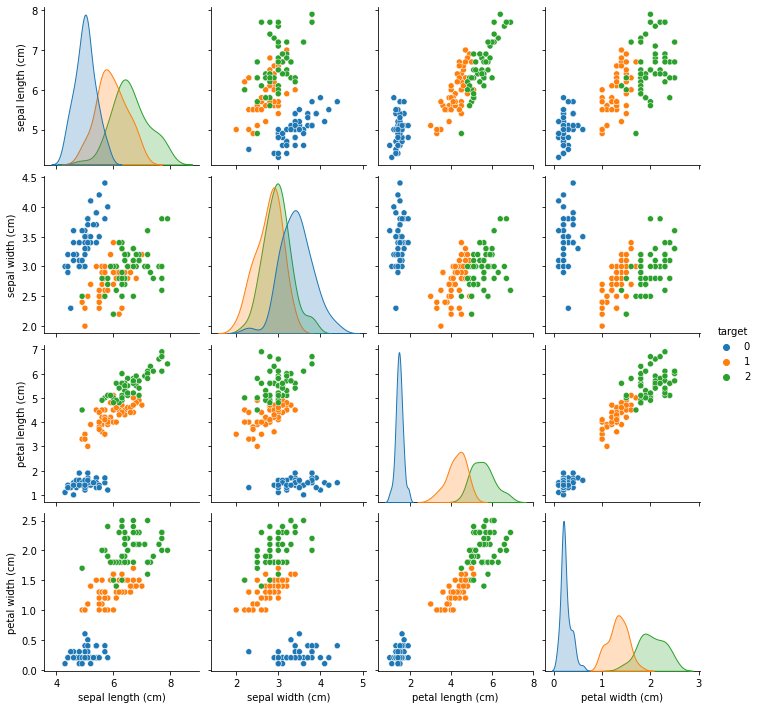

In [43]:
sb.pairplot(data, hue = 'target')

In [44]:
from sklearn import metrics

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

param_grid = [
    {'n_neighbors': list(range(1, 100))}
  ]

grid_search = GridSearchCV(knn, param_grid, cv=10,
                           return_train_score=True)


grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

Text(0, 0.5, 'Accuracy')

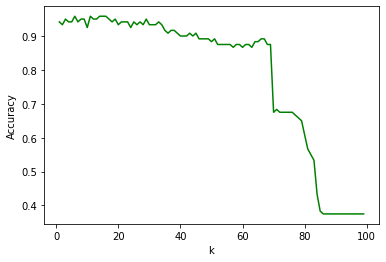

In [46]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(grid_search.cv_results_["param_n_neighbors"], grid_search.cv_results_["mean_test_score"], color="green")
plt.xlabel("k")
plt.ylabel("Accuracy") 

In [47]:
print(grid_search.best_params_)

{'n_neighbors': 11}


In [49]:
knn = KNeighborsClassifier(n_neighbors = 11)

knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred))

1.0
